In [2]:
keyboard_layout = {
    "top_row": {
        "keys": [
            ("Esc", 1),
            ("F1", 1),
            ("F2", 1),
            ("F3", 1),
            ("F4", 1),
            ("F5", 1),
            ("F6", 1),
            ("F7", 1),
            ("F8", 1),
            ("F9", 1),
            ("F10", 1),
            ("F11", 1),
            ("F12", 1),
            ("prt sc", 2),
        ],
        "x": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
        "y": 5,
        "frequency": [0] * 14,
    },
    "num_row": {
        "keys": [
            ("`", 1),
            ("1", 1),
            ("2", 1),
            ("3", 1),
            ("4", 1),
            ("5", 1),
            ("6", 1),
            ("7", 1),
            ("8", 1),
            ("9", 1),
            ("0", 1),
            ("-", 1),
            ("=", 1),
            ("Backspace", 2),
        ],
        "x": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
        "y": 4,
        "frequency": [0] * 14,
    },
    "qwerty_row": {
        "keys": [
            ("Tab", 1.5),
            ("Q", 1),
            ("W", 1),
            ("E", 1),
            ("R", 1),
            ("T", 1),
            ("Y", 1),
            ("U", 1),
            ("I", 1),
            ("O", 1),
            ("P", 1),
            ("[", 1),
            ("]", 1),
            ("\\", 1.5),
        ],
        "x": [0, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5],
        "y": 3,
        "frequency": [0] * 14,
    },
    "asdf_row": {
        "keys": [
            ("Caps", 1.75),
            ("A", 1),
            ("S", 1),
            ("D", 1),
            ("F", 1),
            ("G", 1),
            ("H", 1),
            ("J", 1),
            ("K", 1),
            ("L", 1),
            (";", 1),
            ("'", 1),
            ("Enter", 2.25),
        ],
        "x": [
            0,
            1.75,
            2.75,
            3.75,
            4.75,
            5.75,
            6.75,
            7.75,
            8.75,
            9.75,
            10.75,
            11.75,
            12.75,
        ],
        "y": 2,
        "frequency": [0] * 13,
    },
    "zxcv_row": {
        "keys": [
            ("Shift", 2.25),
            ("Z", 1),
            ("X", 1),
            ("C", 1),
            ("V", 1),
            ("B", 1),
            ("N", 1),
            ("M", 1),
            (",", 1),
            (".", 1),
            ("/", 1),
            ("Shift", 2.75),
        ],
        "x": [0, 2.25, 3.25, 4.25, 5.25, 6.25, 7.25, 8.25, 9.25, 10.25, 11.25, 12.25],
        "y": 1,
        "frequency": [0] * 12,
    },
    "bottom_row": {
        "keys": [
            ("Ctrl", 1.5),
            ("Win", 1),
            ("Alt", 1.5),
            ("Space", 6),
            ("Alt", 1.5),
            ("Fn", 1),
            ("Ctrl", 1.5),
            ("del", 1),
        ],
        "x": [0, 1.5, 2.5, 4.0, 10.0, 11.5, 12.5, 13],
        "y": 0,
        "frequency": [0] * 8,
    },
}

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np


# Function to draw a key at a specified location
def draw_key(ax, x, y, width, height, label, fontsize=10):
    # Create the rectangle for the key
    rect = patches.Rectangle(
        (x, y), width, height, linewidth=1, edgecolor="black", facecolor="none"
    )
    ax.add_patch(rect)

    # Add label in the center of the key
    ax.text(
        x + width / 2,
        y + height / 2,
        label,
        ha="center",
        va="center",
        fontsize=fontsize,
    )


# Function to draw the keyboard layout
def draw_keyboard(ax):
    key_h = 1  # Standard key height
    # Iterate over each row and draw the keys
    for row in keyboard_layout.values():
        y = row["y"]
        x = 0  # Reset x for each row
        for label, width in row["keys"]:
            draw_key(ax, x, y, width, key_h, label)
            x += width  # Increment x by key width for the next key

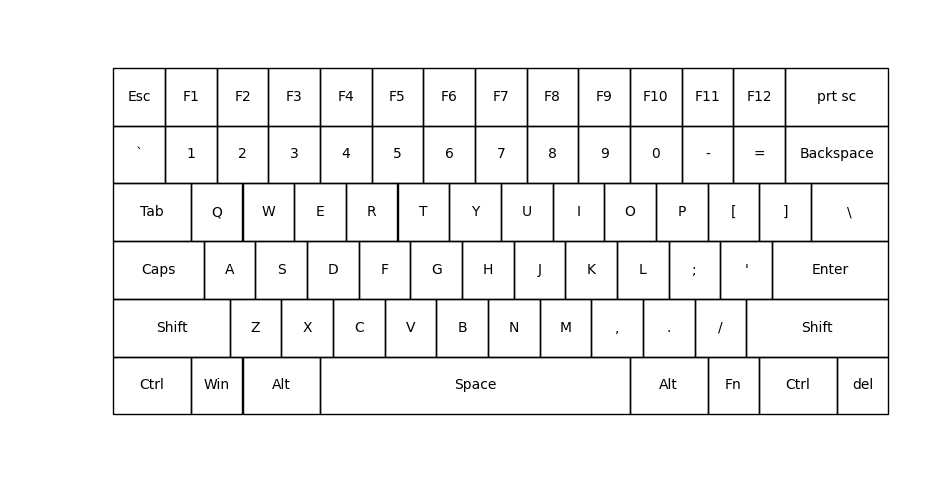

In [4]:
# Main code to create the plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlim(-2, 16)  # Adjust limits to fit the keyboard
ax.set_ylim(-1, 7)  # Adjust limits to fit the keyboard
ax.set_axis_off()

# Draw the keyboard
draw_keyboard(ax)

# Show the plot
plt.show()

In [5]:
user_input = input("Enter something: ")
user_input = user_input.replace(
    " ", ""
)  # remove spaces in the input to ensure proper distance calculation

Enter something:  The code has been executed


In [6]:
def key_dist(
    x1, y1, x2, y2
):  # define function to calculate distance based on coordinates
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5


def calculate_distance(string):
    n = len(string)
    y = np.zeros(n, dtype=float)
    x = np.zeros(n, dtype=float)
    # obtain coordinates of the shift key from the dictionary
    shift_y = keyboard_layout["zxcv_row"]["y"]
    shift_x_left = keyboard_layout["zxcv_row"]["x"][0]
    shift_x_right = keyboard_layout["zxcv_row"]["x"][-1]
    # load the x y coordinates in a numpy array
    for i in range(n):
        for row in keyboard_layout.values():
            for index, (label, width) in enumerate(row["keys"]):
                if label.lower() == string[i].lower():
                    y[i] = row["y"]
                    x[i] = row["x"][index]

    total_distance = 0
    for i in range(1, n):
        if string[i].isupper():
            # Find the closer shift key (left or right)
            dist_to_shift_left = (
                (x[i - 1] - shift_x_left) ** 2 + (y[i - 1] - shift_y) ** 2
            ) ** 0.5
            dist_to_shift_right = (
                (x[i - 1] - shift_x_right) ** 2 + (y[i - 1] - shift_y) ** 2
            ) ** 0.5

            if dist_to_shift_left < dist_to_shift_right:
                shift_x = shift_x_left
            else:
                shift_x = shift_x_right
            # distance for uppercase letters will be the sum of distances from shift key
            total_distance += key_dist(x[i - 1], y[i - 1], shift_x, shift_y) + key_dist(
                shift_x, shift_y, x[i], y[i]
            )
        else:
            # just take distance between consecutive letters if lowercase
            total_distance += key_dist(x[i - 1], y[i - 1], x[i], y[i])

    return total_distance

In [7]:
print(calculate_distance(user_input))

59.57706685431079


In [8]:
def get_frequency(key):
    for row in keyboard_layout.values():
        # iterate over all the keys in a row to find out the proper match
        for index, (label, width) in enumerate(row["keys"]):
            if label == key:
                # increment the frequency value for the particular input key
                row["frequency"][index] += 1
                return


for key in user_input.upper():  # use .upper as dictionary has elemnts in upeercase
    get_frequency(key)

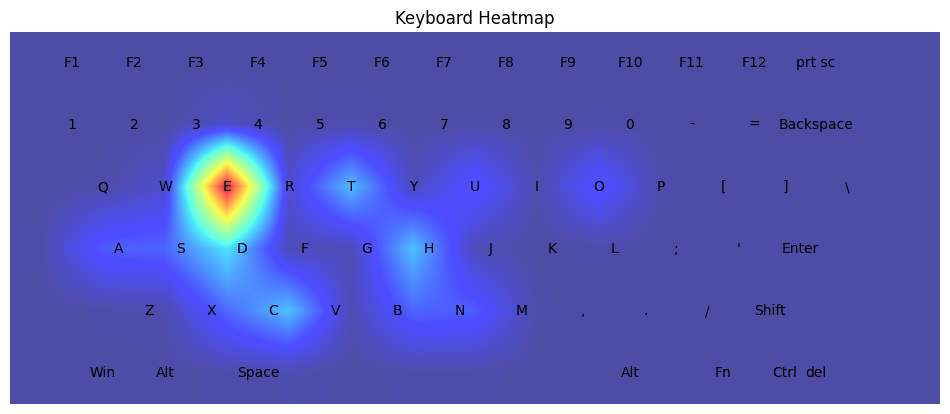

In [9]:
from scipy.ndimage import gaussian_filter

max_width = 15  
max_height = 6 

# Create a 2D array with NaN values
heatmap_data = np.full((max_height, max_width), np.nan)

# Fill the heatmap data with frequencies
for row in keyboard_layout.values():
    for i, x in enumerate(row["x"]):
        heatmap_data[max_height - 1 - row["y"], int(x)] = row["frequency"][i]  # Reverse y-axis for correct orientation

# Apply a Gaussian filter for smoothing
heatmap_data = gaussian_filter(np.nan_to_num(heatmap_data), sigma=0.4) 

# Plotting the heatmap
plt.figure(figsize=(12, 6))
plt.imshow(heatmap_data, cmap="jet", interpolation="bilinear", alpha=0.7) #use jet colormap and reduce color intensity by setting alpha to 0.7


# Add text labels for each key
for row in keyboard_layout.values():
    for i, key in enumerate(row["keys"]):
        if i == 0:  # Skip the first key in each row
            continue
        x = row["x"][i] - 0.5
        y = row["y"]
        label = key[0]
        plt.text(
            x,
            max_height - 1 - y,
            label,
            ha="center",
            va="center",
            color="black",
            fontsize=10,
        )


# Customize the heatmap

plt.title("Keyboard Heatmap")
plt.axis("off")  # Hide axes
plt.show()